# Final Project: College Tuition Prices By Demographic

By: Adam Niebylski

The purpose of this final project is to showcase the material learned from the CodeAcademy "Data Analyst" specialization under the Data Scientist Pathway. I will be analyzing the trends of demographics and their college tuition prices, to see if there are patterns in their earning potential.

This data for this analysis was extracted from the author JESSE MOSTIPAK, with the following Kaggle link description:
https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay?select=historical_tuition.csv

### The goals of the project are as follows:

 1) Decide on what the analysis of the data will be 
 
 2) Figure out what data within the initial dataset will be useful
 
 3) Clean the data set for analysis
 
 4) Understand how the data relates based on the goals desired from step #1
 
 5) Draw conclusions from the data, and formulate insights

### Import Libraries:

In [180]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#from bs4 import BeautifulSoup

### Load and Inspect Data Sets:

We will be renaming the datasets for the following csv files: 

* 'diversity_school', which details the diversity demographics for each college

* 'tuition_cost.csv', which details the tuition costs of the various colleges 

* 'salary_potential', which details the amount of money that alumni students from colleges make

In [120]:
diversity = pd.read_csv("diversity_school.csv")
cost = pd.read_csv("tuition_cost.csv")
potential = pd.read_csv("salary_potential.csv")

print(diversity.columns)
print()
print(cost.columns)
print()
print(potential.columns)

Index(['name', 'total_enrollment', 'state', 'category', 'enrollment'], dtype='object')

Index(['name', 'state', 'state_code', 'type', 'degree_length',
       'room_and_board', 'in_state_tuition', 'in_state_total',
       'out_of_state_tuition', 'out_of_state_total'],
      dtype='object')

Index(['rank', 'name', 'state_name', 'early_career_pay', 'mid_career_pay',
       'make_world_better_percent', 'stem_percent'],
      dtype='object')


The data sets above contain useful fiscal information about colleges as well as student demographics, in order to make our analysis easier, let's combine the data sets on the name of the college. 

Before combining the data sets, lets make sure the data we're working with is clean enough to deal with, staring with the diversity dataset:

In [69]:
diversity.isna().sum()

name                341
total_enrollment      0
state               341
category              0
enrollment            0
dtype: int64

In [70]:
diversity.count()

name                50314
total_enrollment    50655
state               50314
category            50655
enrollment          50655
dtype: int64

In [71]:
cost.isna().sum()

name                       0
state                     52
state_code                 0
type                       0
degree_length              0
room_and_board          1094
in_state_tuition           0
in_state_total             0
out_of_state_tuition       0
out_of_state_total         0
dtype: int64

In [72]:
cost.count()

name                    2973
state                   2921
state_code              2973
type                    2973
degree_length           2973
room_and_board          1879
in_state_tuition        2973
in_state_total          2973
out_of_state_tuition    2973
out_of_state_total      2973
dtype: int64

In [73]:
potential.isna().sum()

rank                          0
name                          0
state_name                    0
early_career_pay              0
mid_career_pay                0
make_world_better_percent    33
stem_percent                  0
dtype: int64

In [74]:
potential.count()

rank                         935
name                         935
state_name                   935
early_career_pay             935
mid_career_pay               935
make_world_better_percent    902
stem_percent                 935
dtype: int64

Judging by the output on 'nan' values from the 3 datasets, we can see the following:

* 341 college and state names are missing in the 'diversity' dataset 

* 52 state names and 1094 room and board values are missing from the 'cost' dataset 

* 33 values from the 'make_world_better_percent' column are missing

#### Decision based on 'nan' values:

* Seeing that we need the names of colleges to perform our analysis, we can drop those 341 nan college names from the 'diversity' column.

* Since our focus in our analysis on costs colleges require, we will be soley looking at Tuition costs, so we can drop the 'rooom_and_board' column completely, taking care of the 1094 missing values. We can keep the missing values of states since we have the college names. 

* Since unfortunately we're not concirned about the posative impact from these graduating students, and moreso on their overall resulting compensation, we will drop the 'make_world_better_percent' column. This will symplify our analysis. 

In [121]:
diversity = diversity.dropna(axis = 0)
diversity = diversity.reset_index(drop=True)
print(diversity.isna().sum())
print(diversity.count())

name                0
total_enrollment    0
state               0
category            0
enrollment          0
dtype: int64
name                50314
total_enrollment    50314
state               50314
category            50314
enrollment          50314
dtype: int64


In [122]:
cost.drop("room_and_board", axis=1, inplace=True)
print(cost.isna().sum())
print(cost.count())

name                     0
state                   52
state_code               0
type                     0
degree_length            0
in_state_tuition         0
in_state_total           0
out_of_state_tuition     0
out_of_state_total       0
dtype: int64
name                    2973
state                   2921
state_code              2973
type                    2973
degree_length           2973
in_state_tuition        2973
in_state_total          2973
out_of_state_tuition    2973
out_of_state_total      2973
dtype: int64


In [123]:
potential.drop("make_world_better_percent", axis=1, inplace=True)
print(potential.isna().sum())
print(potential.count())

rank                0
name                0
state_name          0
early_career_pay    0
mid_career_pay      0
stem_percent        0
dtype: int64
rank                935
name                935
state_name          935
early_career_pay    935
mid_career_pay      935
stem_percent        935
dtype: int64


One other thing we'll redo is rename the 'category' column to 'identification' in the 'diversity' dataset, to more clearly show the individuals' demographic.

In [124]:
diversity.rename(columns = {'category':'identification'}, inplace = True)
print(diversity.columns)

Index(['name', 'total_enrollment', 'state', 'identification', 'enrollment'], dtype='object')


#### Joining the datasets:

We will be performing an inner join with the 3 datasets:

In [125]:
firstcomb = pd.merge(diversity, cost,how = 'inner', on = 'name')

In [126]:
combined = pd.merge(firstcomb, potential, how = 'inner', on = 'name')

In [127]:
print(combined.columns)

Index(['name', 'total_enrollment', 'state_x', 'identification', 'enrollment',
       'state_y', 'state_code', 'type', 'degree_length', 'in_state_tuition',
       'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'rank',
       'state_name', 'early_career_pay', 'mid_career_pay', 'stem_percent'],
      dtype='object')


In [128]:
print(combined.isna().sum())

name                    0
total_enrollment        0
state_x                 0
identification          0
enrollment              0
state_y                 0
state_code              0
type                    0
degree_length           0
in_state_tuition        0
in_state_total          0
out_of_state_tuition    0
out_of_state_total      0
rank                    0
state_name              0
early_career_pay        0
mid_career_pay          0
stem_percent            0
dtype: int64


In [129]:
print(combined.state_x.count())
print(combined.state_y.count())
print(combined.state_x.isna().count())
print(combined.state_y.isna().count())
print((combined.state_x == combined.state_x).sum())

7040
7040
7040
7040
7040


In [130]:
combined.drop("state_x", axis=1, inplace=True)
combined.drop("state_code", axis=1, inplace=True)
combined.rename(columns = {'state_y':'state'}, inplace = True)
print(combined.isna().sum())

name                    0
total_enrollment        0
identification          0
enrollment              0
state                   0
type                    0
degree_length           0
in_state_tuition        0
in_state_total          0
out_of_state_tuition    0
out_of_state_total      0
rank                    0
state_name              0
early_career_pay        0
mid_career_pay          0
stem_percent            0
dtype: int64


We have a clean consolidated dataset and have gotten rid of duplicate columns in the state column, we're now able to move on to our exploratory analysis:

### Exploratory Data Analysis

The focus of this analysis will surround around the following dependant variables:

* in_state_total
* out_of_state_total
* early_career_pay
* mid_career_pay

We will be using the following independant variables to determine how they affect the focused dependant ones above:

* identification(student demographics) 

Lets take a quick glance at the various focus columns to acertain a distribution summary:

In [136]:
print(combined['in_state_total'].describe())
print(combined['out_of_state_total'].describe())
print(combined['early_career_pay'].describe())
print(combined['mid_career_pay'].describe())

count     7040.000000
mean     37275.518750
std      18733.394427
min       4258.000000
25%      19664.250000
50%      35654.000000
75%      53057.000000
max      75003.000000
Name: in_state_total, dtype: float64
count     7040.000000
mean     41554.839063
std      15597.386896
min       6670.000000
25%      29991.000000
50%      39114.000000
75%      53166.250000
max      75003.000000
Name: out_of_state_total, dtype: float64
count     7040.000000
mean     50873.906250
std       8310.606267
min      32500.000000
25%      45300.000000
50%      49400.000000
75%      54800.000000
max      88800.000000
Name: early_career_pay, dtype: float64
count      7040.00000
mean      92023.59375
std       15905.53424
min       60100.00000
25%       81000.00000
50%       88750.00000
75%       99900.00000
max      158200.00000
Name: mid_career_pay, dtype: float64


From a glance, we see that generally, the cost of enrollement across all areas, are rightly skewed, with the mean value being greator than the median. For example, the 'out_of_state_total' median (labeled as '50%' quartile) is 39,114 with the mean comparitively at 41,554. 

The right skewness suggest that there are a few high values as opposed to the many small values of college tuition. 

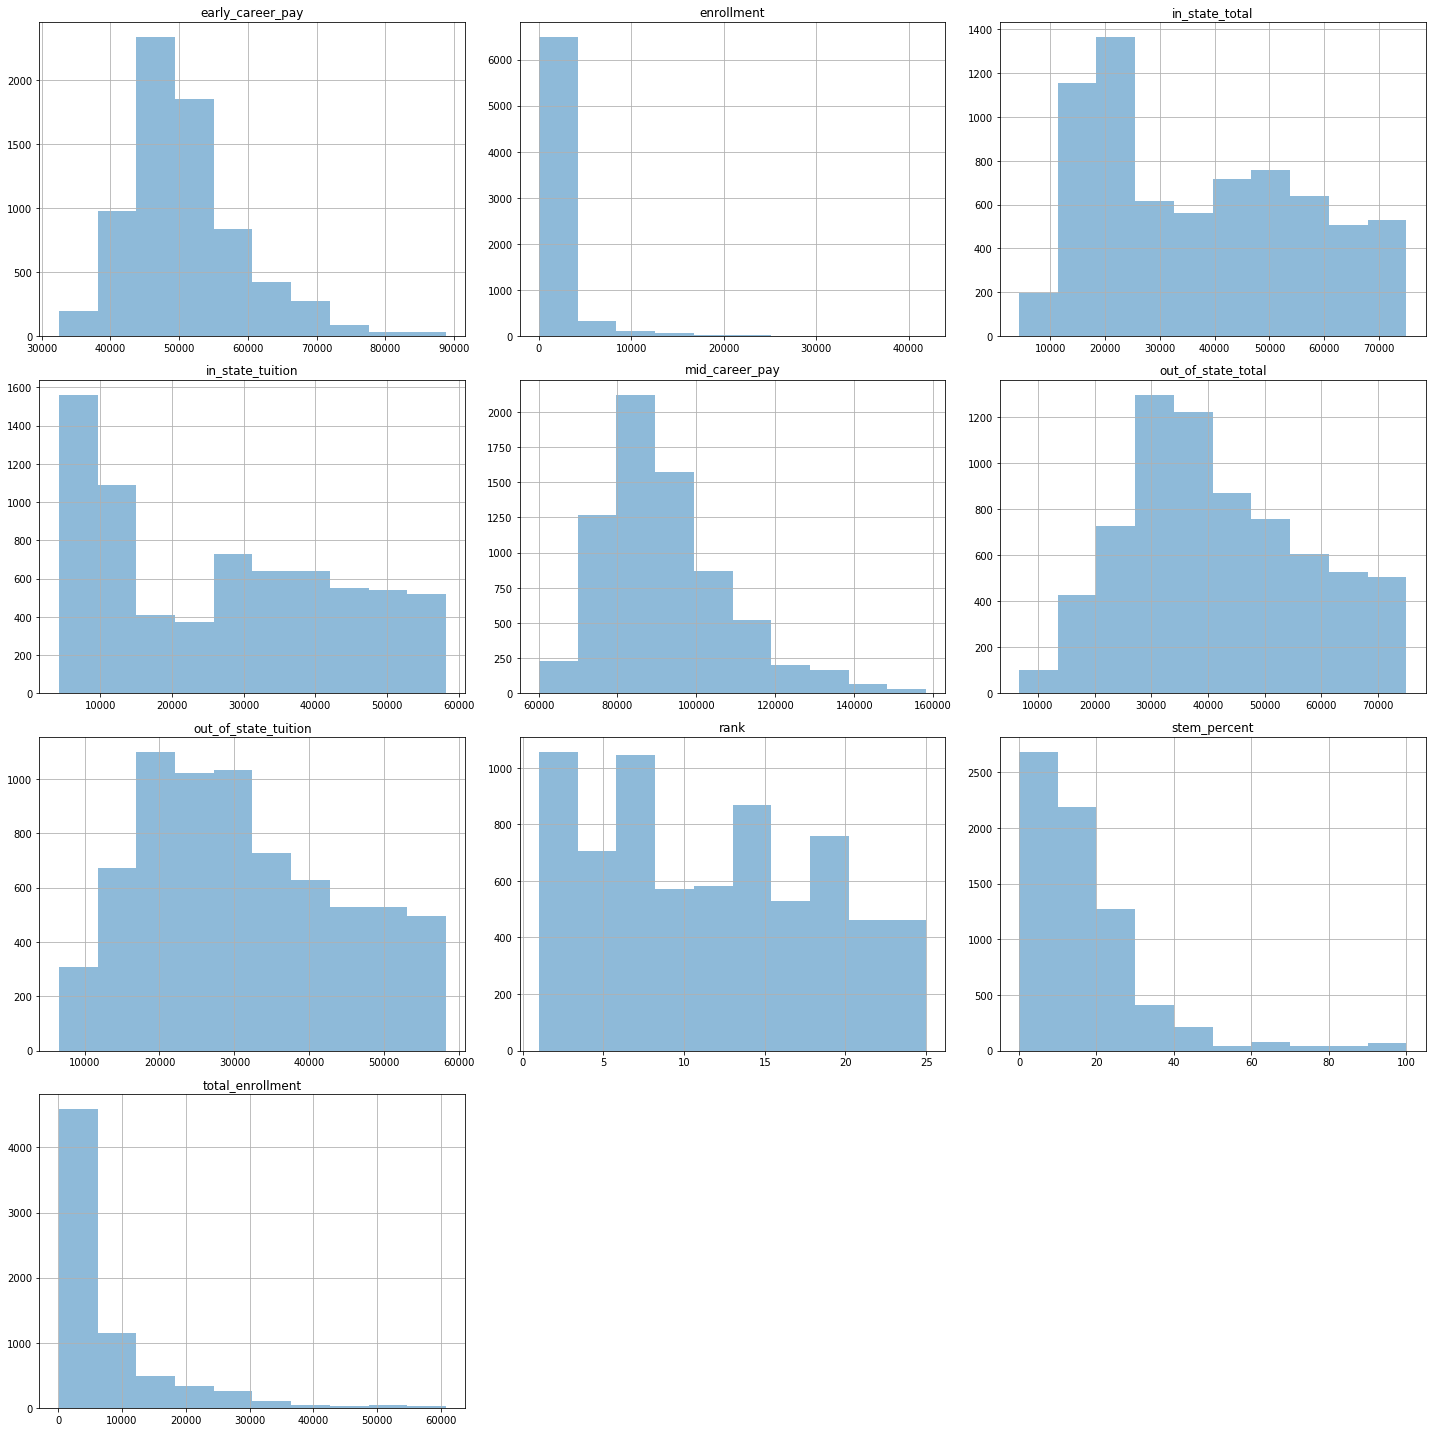

In [147]:
combined.hist(alpha=0.5, figsize=(20, 20))
plt.tight_layout()
plt.show()

This visual representation of our dataframes columns confirms that our various tuition pricing is right skewed, and that also the pay recieved outside of college, in early stage and mid stage, are also rightly skewed. There are a few values in the higher end of the spectrum for these variables, and a lot of low values conversely. 

Lets look at a corrolation at the various variables in order to understand which areas require more of our attention. 

In [148]:
combined.corr()

,total_enrollment,enrollment,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,early_career_pay,mid_career_pay,stem_percent
total_enrollment,1.000000,0.513130,-0.259758,-0.204789,-0.059269,-0.022847,-0.172377,0.205583,0.204651,0.065371
enrollment,0.513130,1.000000,-0.136738,-0.108448,-0.037101,-0.017706,-0.073802,0.095254,0.094528,0.022736
in_state_tuition,-0.259758,-0.136738,1.000000,0.988992,0.926024,0.908659,-0.177565,0.525406,0.556986,0.271884
in_state_total,-0.204789,-0.108448,0.988992,1.000000,0.938088,0.943445,-0.191378,0.555932,0.589835,0.297527
out_of_state_tuition,-0.059269,-0.037101,0.926024,0.938088,1.000000,0.986541,-0.276979,0.646642,0.678459,0.368213
out_of_state_total,-0.022847,-0.017706,0.908659,0.943445,0.986541,1.000000,-0.273786,0.654034,0.688075,0.378180
rank,-0.172377,-0.073802,-0.177565,-0.191378,-0.276979,-0.273786,1.000000,-0.520518,-0.533777,-0.407443
early_career_pay,0.205583,0.095254,0.525406,0.555932,0.646642,0.654034,-0.520518,1.000000,0.984952,0.638441
mid_career_pay,0.204651,0.094528,0.556986,0.589835,0.678459,0.688075,-0.533777,0.984952,1.000000,0.645638
stem_percent,0.065371,0.022736,0.271884,0.297527,0.368213,0.378180,-0.407443,0.638441,0.645638,1.000000


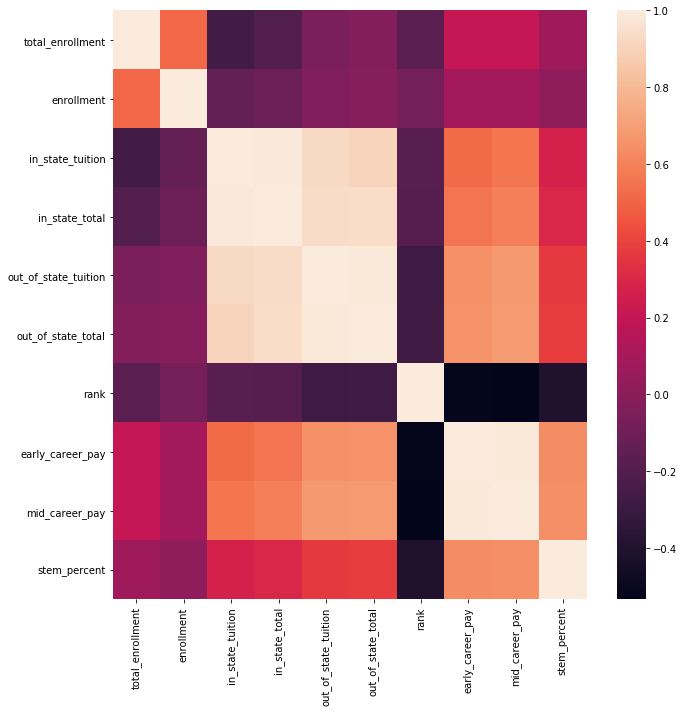

In [149]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=combined.corr(),annot=False)
plt.tight_layout()
plt.show()

We can see that the following variables are highly coorolated to one another:

* mid_career_pay vs. early_career_pay
* out_of_state_tuition vs. out_of_state_total
* in_state_tuition vs. in_state_total
* out_of_state_tuition vs. in_state_tuition

Let's now get into more depth on our analysis with the above dependant variables. 
Specifically, how they interact with the independant variable:

* identification

#### How is Pay affected by Tuition Price and Demographics:

A for loop is used to see the relationship between a tuition variable(in this case out_of_state_tuition) and each career_pay variable. The hue parameter with the identification variable is used to see if there are any patterns that can be deciphered between identification and career_pay variables.

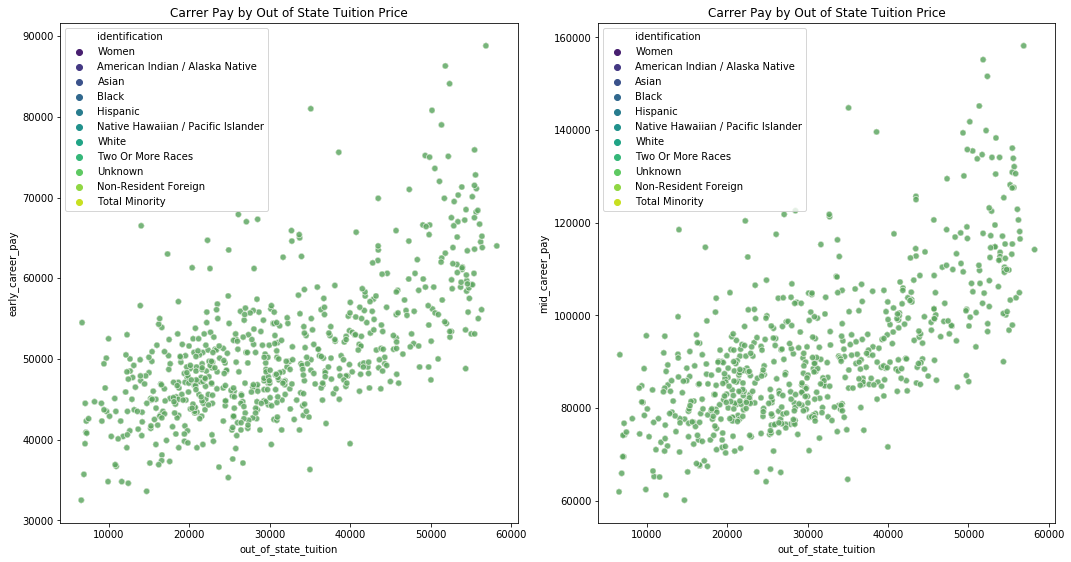

In [161]:
# num purchases columns list
num_pay_cols = ["early_career_pay", "mid_career_pay"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,15))
# loop through number of columns to plot
for i in range(len(num_pay_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=combined["out_of_state_tuition"], y= combined[num_pay_cols[i]], 
                    hue=combined["identification"], palette="viridis", alpha = 0.15)
    plt.title("Carrer Pay by Out of State Tuition Price")

plt.tight_layout()
plt.show()

There does appear to be some corrolation between tuition and career pay, all demographics eavenly spread out over the plot. Lets make a regression to confirm our suspicion of corrolation:

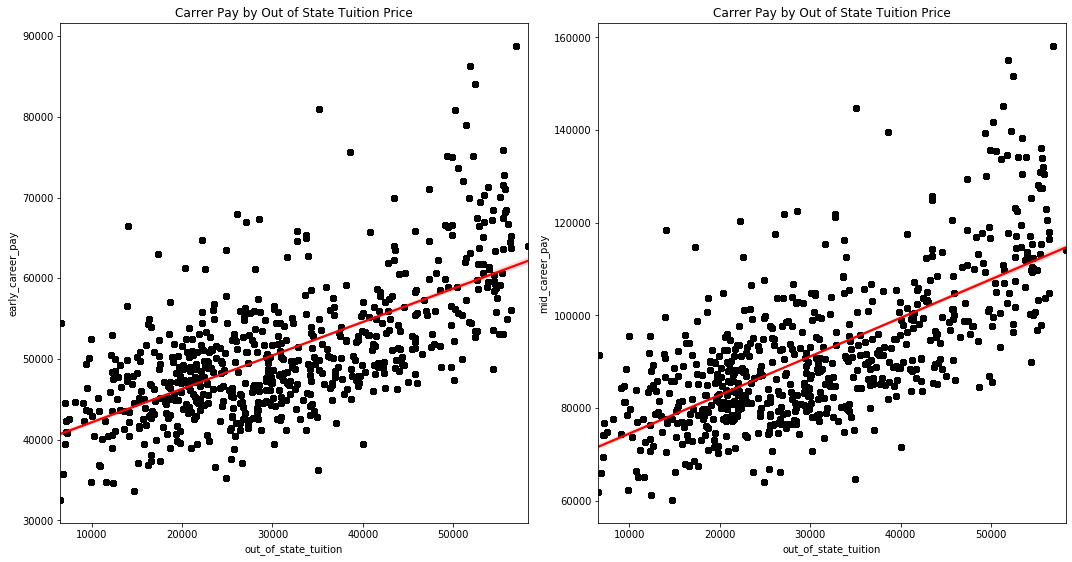

In [162]:
# num purchases columns list
num_pay_cols = ["early_career_pay", "mid_career_pay"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,15))
# loop through number of columns to plot
for i in range(len(num_pay_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.regplot(x=combined["out_of_state_tuition"], y= combined[num_pay_cols[i]], 
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Carrer Pay by Out of State Tuition Price")

plt.tight_layout()
plt.show()

This would indicate a posative corrolation between tuition prices and earning potential. Let's confirm that for the in-state tuition. 

#### In-state tuition vs. Career Pay:

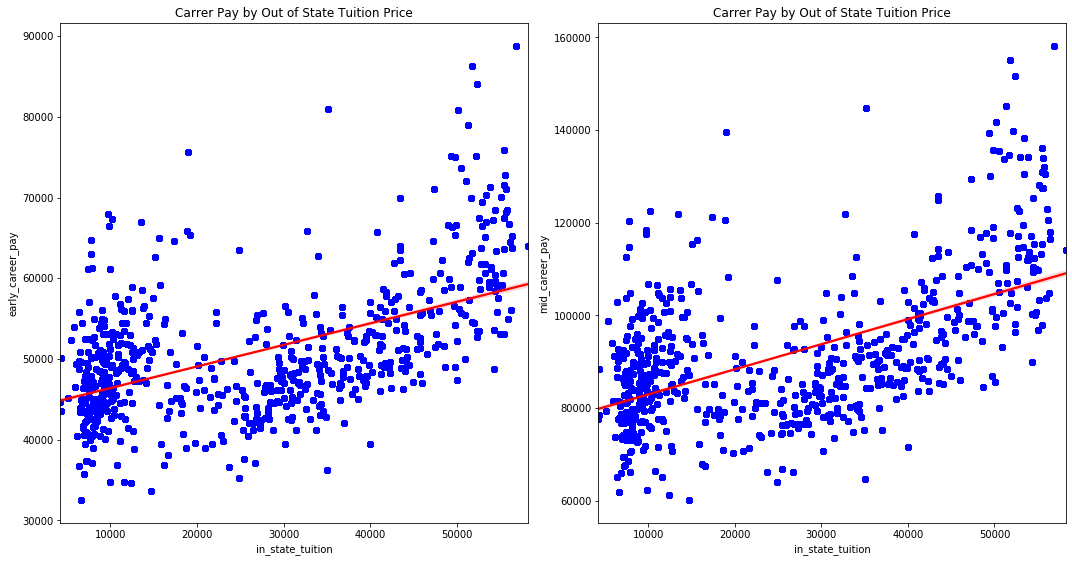

In [163]:
# num purchases columns list
num_pay_cols = ["early_career_pay", "mid_career_pay"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,15))
# loop through number of columns to plot
for i in range(len(num_pay_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.regplot(x=combined["in_state_tuition"], y= combined[num_pay_cols[i]], 
                    scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title("Carrer Pay by Out of State Tuition Price")

plt.tight_layout()
plt.show()

This confirms the posative corrolation of overall career pay increasing with overall tuition price.

Lets see if we can attain any further insights from looking at outliners in this data:

#### Using boxplots to understand outliners:

We will be using boxplots with data that we used for our scatter plots, in order to see if demographics(column name 'identification') are more impacted with one variable or another, specifically these variables:

* in_state_total
* out_of_state_total
* early_career_pay
* mid_career_pay


In [166]:
#combined.identification.value_counts()

Two Or More Races                     640
Non-Resident Foreign                  640
White                                 640
Hispanic                              640
Unknown                               640
Asian                                 640
Black                                 640
Women                                 640
Native Hawaiian / Pacific Islander    640
American Indian / Alaska Native       640
Total Minority                        640
Name: identification, dtype: int64

### Conclusion

Based on our analysis we can confirm that the higher the education tuition across the board, the more a student can expect to make in the longrun. Some interesting takeaways however:

* Its not garenteed that a student will make more money in the long-run if they pay a high tuition rate. The corrolation is weak, a shown by the slight upward slant in our regression scatterplots, indicating that college might not have the best ROI from a financial standpoint.

* All demographics of people were generally equally affected, showing that discrimination on one particular group or another was not neccessarily present. 